<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_series_of_Transfer_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets create a series of TransferLearning Experiments we mean models


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-09-19 10:18:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   155MB/s    in 0.8s    

2025-09-19 10:18:27 (155 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [4]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-19 10:18:27--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-19 10:18:27 (75.0 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [5]:
import tensorflow as tf

In [6]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [7]:
unzip_data('10_food_classes_1_percent.zip')

In [8]:
train_dir='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [9]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There a

In [10]:
# Data Loader
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=(224,224))
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=(224,224))

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
# create dataset augmentation stage with horizontal flip, rotation,zoom etc
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescale(1./255), only for resnet and like models

],name='augmentation-layer')

Visualize Augmented data and also original images

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

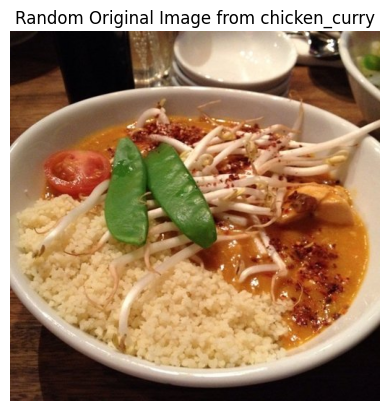

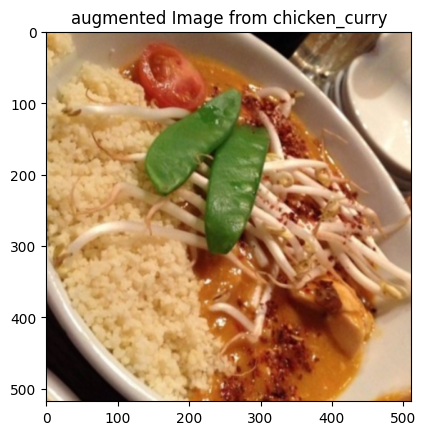

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

target_class=random.choice(train_data_1_percent.class_names)
target_dir='10_food_classes_1_percent/train/'+target_class
random_image_name=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image_name

# Load and display the original image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Random Original Image from {target_class}')
plt.axis('off')

# Now lets plot augmented Data
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f'augmented Image from {target_class}')
plt.imshow(tf.squeeze(augmented_img)/255)